<AxesSubplot:>

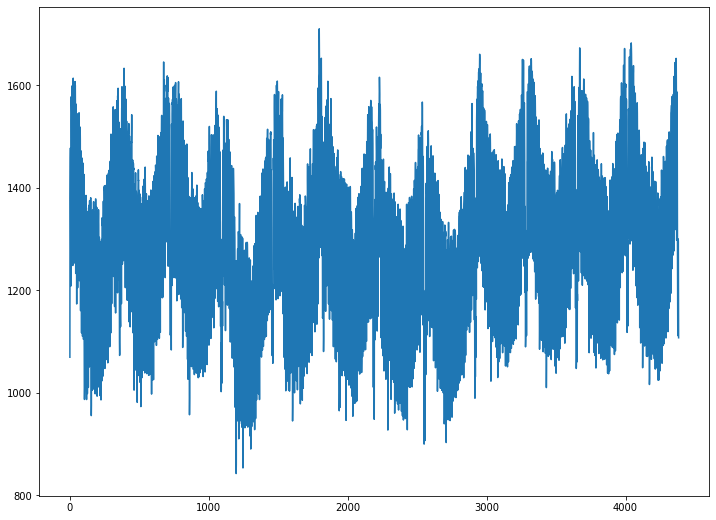

In [3]:
# Autoregressive (AR) models 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg
# Load and plot the time-series data
# Time-series plot representing electricity consumption
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")
plt.figure(figsize=(12, 9))
df['Consumption'].plot()

P-value:  4.7440549018424085e-08 : If the value is less than 0.05, the stationarity exists.


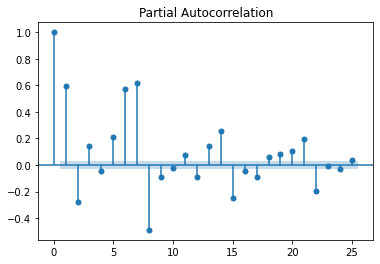

In [5]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(df['Consumption'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1], ": If the value is less than 0.05, the stationarity exists.")
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Consumption'], lags=25)

In [8]:
#
# Create training and test data
#
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=8).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Sat, 25 Sep 2021   AIC                              8.503
Time:                        07:15:39   BIC                              8.518
Sample:                             8   HQIC                             8.509
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

C:\Users\German\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
